In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,f1_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data and display the data head
pd.set_option('display.max_columns',None)
df = pd.read_csv("database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
#checking shape of data
df.shape

(908, 25)

In [4]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [5]:
#checking for null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [6]:
#dropping unecessory columns
df.drop(['gppd_idnr','owner','url','wepp_id','generation_data_source','year_of_capacity_data'],axis=1,inplace=True)

In [7]:
#describing data
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
source                        0
geolocation_source           19
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
estimated_generation_gwh    908
dtype: int64

In [9]:
#checking for unique values in particular column
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [10]:
#filling null values using mode because the are objects
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)

In [11]:
#dropping unecessory data
df.drop(['other_fuel1','other_fuel2','other_fuel3'],axis=1,inplace=True)

In [12]:
#filling the null  value with median 
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median(),inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(),inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(),inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(),inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(),inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].median(),inplace=True)

In [13]:
#dropping the columns
df.drop(['estimated_generation_gwh'],axis=1,inplace=True)
df.drop(['country'],axis=1,inplace=True)
df.drop(['country_long'],axis=1,inplace=True)

In [14]:
#filling the null values
df['latitude'].fillna(df['latitude'].median(),inplace=True)
df['longitude'].fillna(df['longitude'].median(),inplace=True)

In [15]:
#again checking for null values after data cleaning
df.isnull().sum()

name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

<AxesSubplot:>

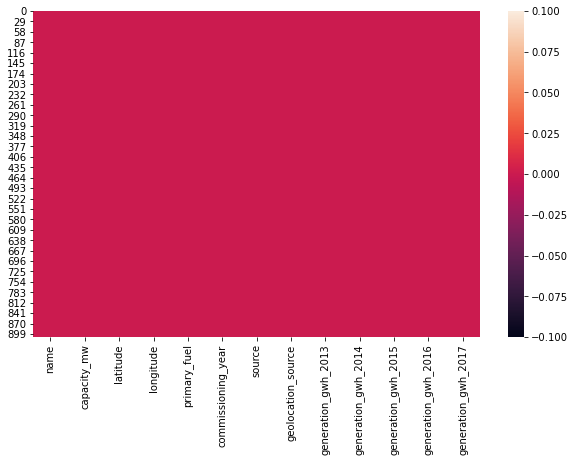

In [16]:
#making heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

there is neither have any null values

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

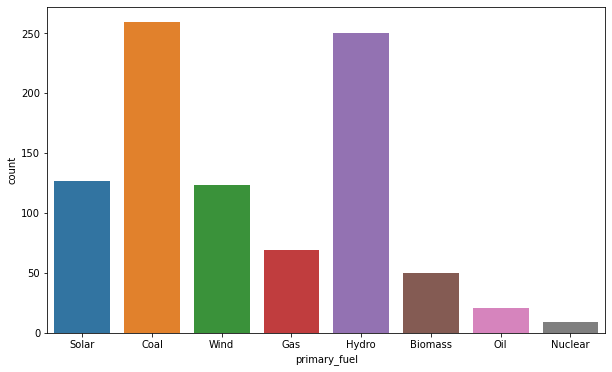

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(df['primary_fuel'])

we can see the coal and hydro are mosstly used as primary fuel of all time

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

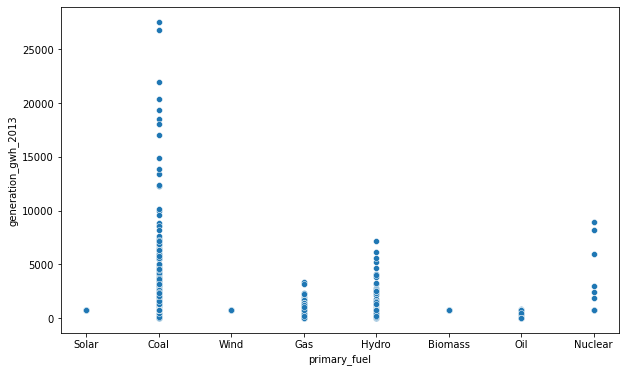

In [18]:
#checking relationship between factors and result
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['primary_fuel'],y=df['generation_gwh_2013'])

we can see the coal is mostly used for power generation after tha nuclear and hydro on average rest of other factors like biomass gas, oil, wind, solar are used less. 

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

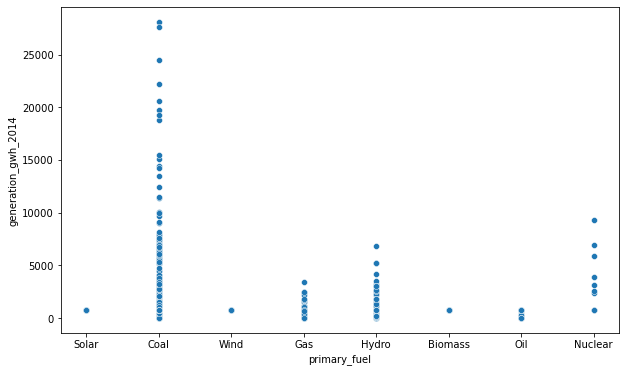

In [19]:
#checking relationship between factors and result
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['primary_fuel'],y=df['generation_gwh_2014'])

In 2014 we can see the coal is mostly used for power generation after tha nuclear and hydro on average rest of other factors like biomass gas, oil, wind, solar are used less.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

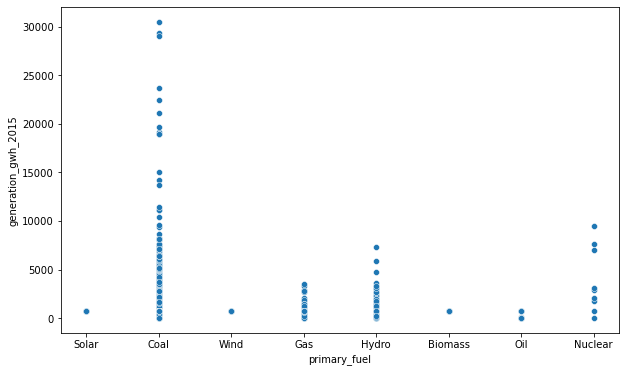

In [20]:
#checking relationship between factors and result
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['primary_fuel'],y=df['generation_gwh_2015'])

we can see the coal is mostly used for power generation after tha nuclear and hydro on average rest of other factors like biomass gas, oil, wind, solar are used less.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

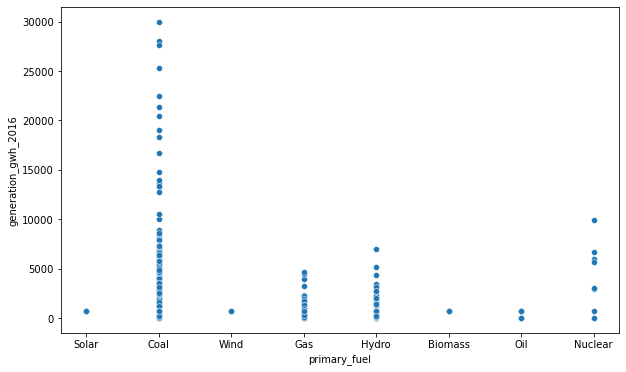

In [21]:
#checking relationship between factors and result
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['primary_fuel'],y=df['generation_gwh_2016'])

In 2016 we can see the coal is mostly used for power generation after that nuclear and hydro on average rest of other factors like biomass, oil, wind, solar are used less.and using gas for power generation is increased in 2016

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

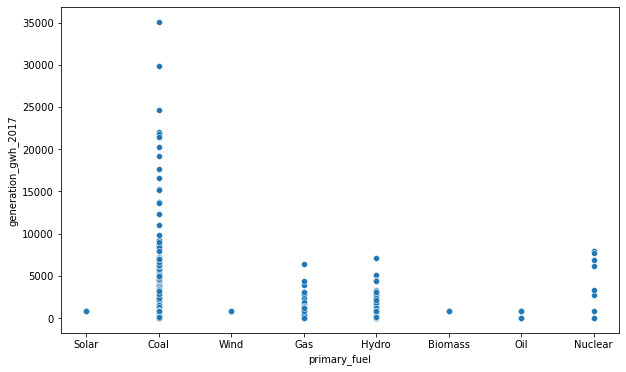

In [22]:
#checking relationship between factors and result
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['primary_fuel'],y=df['generation_gwh_2017'])

In 2017 we can see the coal is mostly used for power generation after that nuclear and hydro on average rest of other factors like biomass, oil, wind, solar are used less.and using gas for power generation is increased in 2017

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

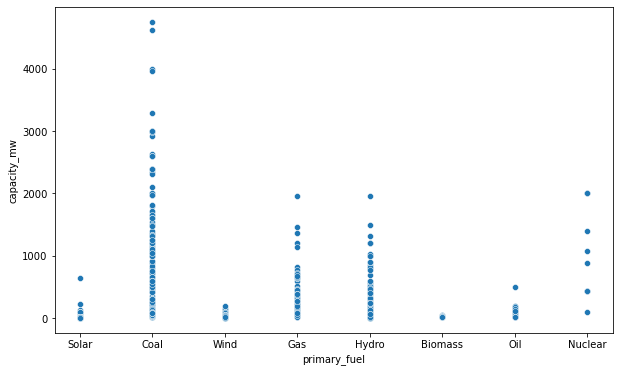

In [23]:
#checking relationship between factors and result
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['primary_fuel'],y=df['capacity_mw'])

we can see coals capacity is high as compare to others

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

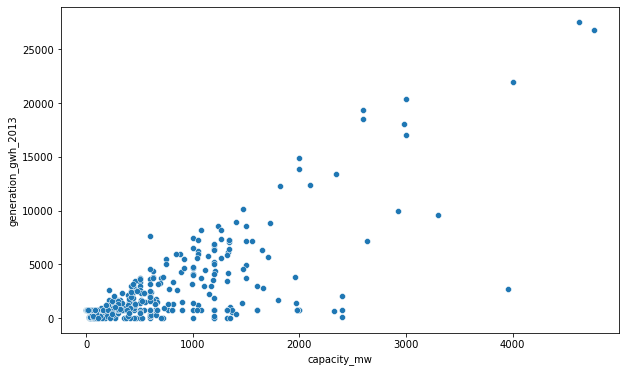

In [24]:
#checking relationship capacity mw and power generation 
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['capacity_mw'],y=df['generation_gwh_2013'])

we can see when the capacity increasing the generation growth is also increassed 

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

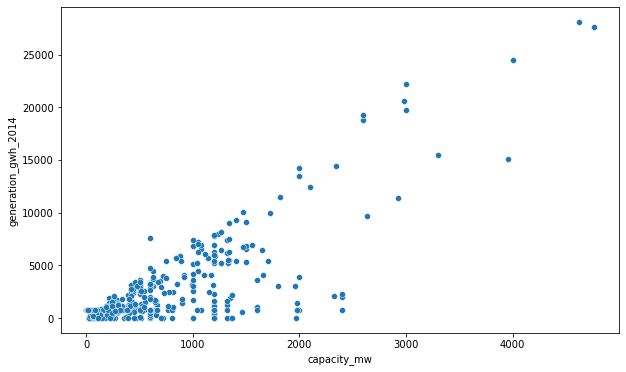

In [25]:
#checking relationship capacity mw and power generation 
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['capacity_mw'],y=df['generation_gwh_2014'])

we can see when the capacity increasing the generation growth is also increassed

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

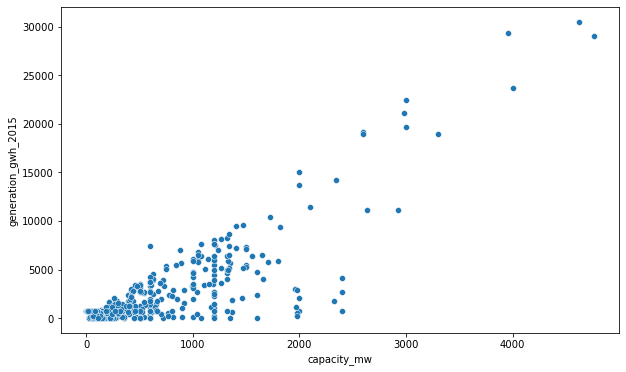

In [26]:
#checking relationship capacity mw and power generation 
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['capacity_mw'],y=df['generation_gwh_2015'])

we can see when the capacity increasing the generation growth is also increassed

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

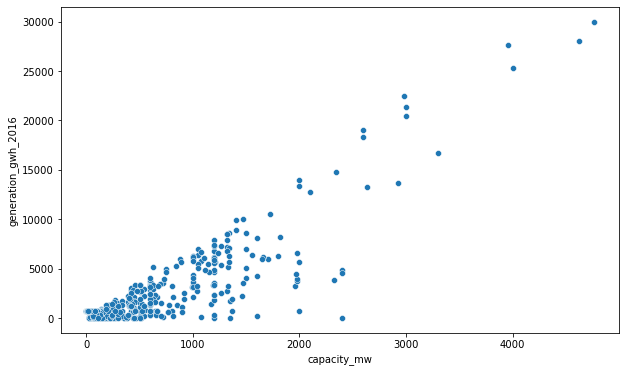

In [27]:
#checking relationship capacity mw and power generation 
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['capacity_mw'],y=df['generation_gwh_2016'])

we can see when the capacity increasing the generation growth is also increassed

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

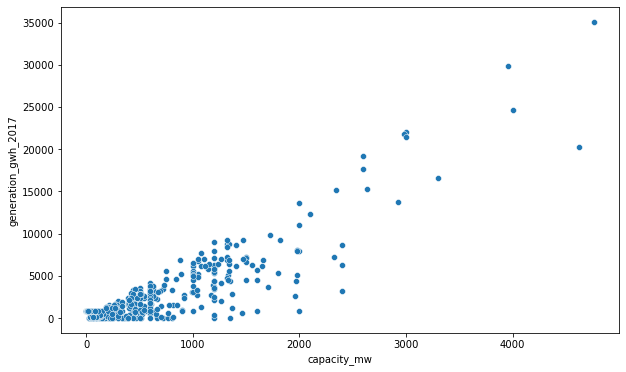

In [28]:
#checking relationship capacity mw and power generation 
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['capacity_mw'],y=df['generation_gwh_2017'])

we can see when the capacity increasing the generation growth is also increassed

In [29]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    object 
 1   capacity_mw          908 non-null    float64
 2   latitude             908 non-null    float64
 3   longitude            908 non-null    float64
 4   primary_fuel         908 non-null    object 
 5   commissioning_year   908 non-null    float64
 6   source               908 non-null    object 
 7   geolocation_source   908 non-null    object 
 8   generation_gwh_2013  908 non-null    float64
 9   generation_gwh_2014  908 non-null    float64
 10  generation_gwh_2015  908 non-null    float64
 11  generation_gwh_2016  908 non-null    float64
 12  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(4)
memory usage: 92.3+ KB


In [31]:
df.drop(['name'],axis=1,inplace=True)

In [32]:
enc=LabelEncoder()
df['primary_fuel']=enc.fit_transform(df['primary_fuel'])
df['source']=enc.fit_transform(df['source'])
df['geolocation_source']=enc.fit_transform(df['geolocation_source'])

In [33]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,109,1,797.063475,805.760000,701.02725,716.728350,807.601700
1,98.0,24.7663,74.6090,1,2000.0,174,2,797.063475,805.760000,701.02725,716.728350,807.601700
2,39.2,21.9038,69.3732,7,2000.0,21,2,797.063475,805.760000,701.02725,716.728350,807.601700
3,135.0,23.8712,91.3602,2,2004.0,22,2,631.777928,617.789264,843.74700,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,22,2,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736


In [34]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.047608,0.200473,-0.377783,0.215667,-0.241701,0.204698,0.756523,0.804581,0.830400,0.863989,0.877058
latitude,0.047608,1.000000,0.030775,-0.010793,0.084220,0.054346,-0.182049,0.053106,0.057527,0.052797,0.046684,0.056430
longitude,0.200473,0.030775,1.000000,-0.352749,0.035731,-0.236349,0.249233,0.102637,0.107967,0.125723,0.148405,0.156255
primary_fuel,-0.377783,-0.010793,-0.352749,1.000000,-0.065716,0.053609,-0.482803,-0.228761,-0.240407,-0.249826,-0.260900,-0.263818
commissioning_year,0.215667,0.084220,0.035731,-0.065716,1.000000,0.085523,-0.061057,0.052258,0.086131,0.118738,0.151269,0.164514
source,-0.241701,0.054346,-0.236349,0.053609,0.085523,1.000000,-0.505823,-0.121131,-0.125425,-0.131500,-0.136135,-0.135138
geolocation_source,0.204698,-0.182049,0.249233,-0.482803,-0.061057,-0.505823,1.000000,0.097530,0.100988,0.105880,0.109612,0.108809
generation_gwh_2013,0.756523,0.053106,0.102637,-0.228761,0.052258,-0.121131,0.097530,1.000000,0.970385,0.907385,0.878836,0.839297
generation_gwh_2014,0.804581,0.057527,0.107967,-0.240407,0.086131,-0.125425,0.100988,0.970385,1.000000,0.963664,0.935000,0.903986
generation_gwh_2015,0.830400,0.052797,0.125723,-0.249826,0.118738,-0.131500,0.105880,0.907385,0.963664,1.000000,0.973256,0.940284


capacity_mw


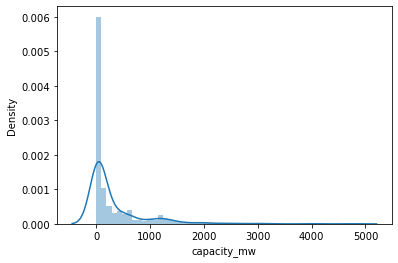

latitude


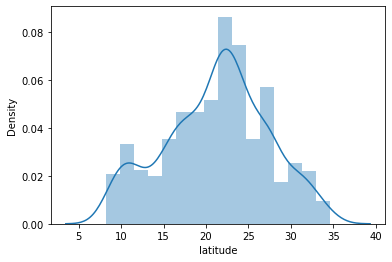

longitude


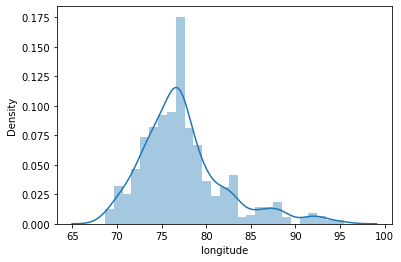

primary_fuel


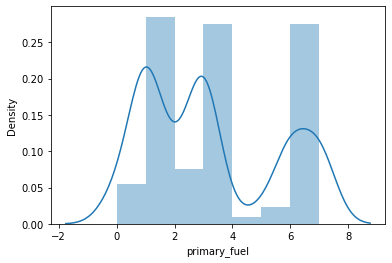

commissioning_year


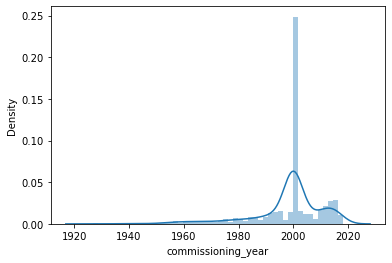

source


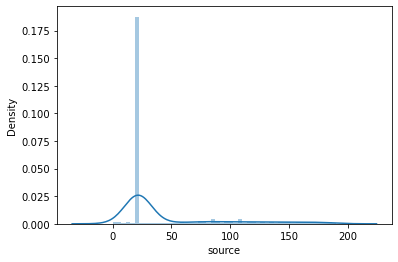

geolocation_source


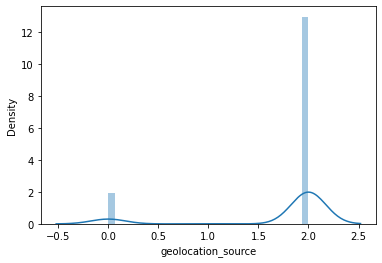

generation_gwh_2013


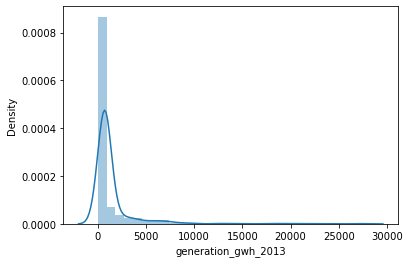

generation_gwh_2014


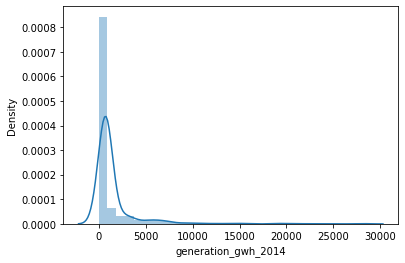

generation_gwh_2015


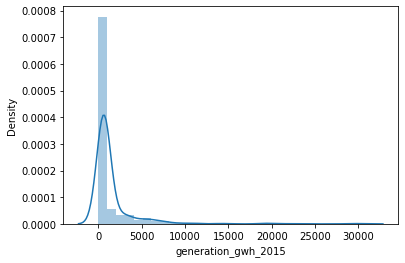

generation_gwh_2016


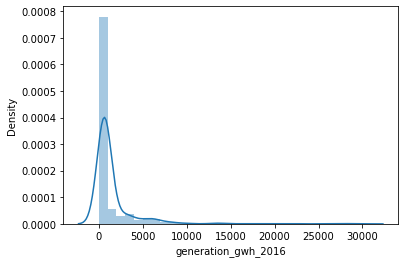

generation_gwh_2017


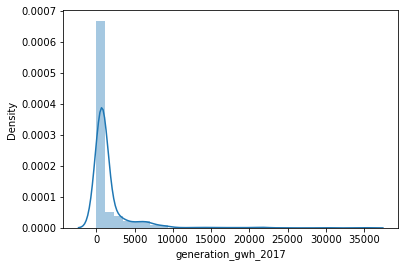

In [36]:
#checking for skewness and outliers in the columns by plloting bar
for columns in df:
    print(columns)
    sns.distplot(df[columns])
    plt.show()

In [37]:
# removing outliers
import numpy as np

z=np.abs(zscore(df))
df_new= df[(z<3).all(axis = 1)]

In [38]:
df.shape

(908, 12)

In [39]:
df_new.shape

(833, 12)

In [40]:
df=df_new

In [41]:
df.skew()

capacity_mw            1.961847
latitude              -0.126512
longitude              0.883761
primary_fuel           0.409668
commissioning_year    -1.199857
source                 1.782665
geolocation_source    -2.102192
generation_gwh_2013    3.058127
generation_gwh_2014    2.910898
generation_gwh_2015    2.699657
generation_gwh_2016    2.645103
generation_gwh_2017    2.540739
dtype: float64

In [42]:
#splitting the data
x = df.drop('capacity_mw',axis =1)
y = df['capacity_mw']

In [43]:
#scalling the data using standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit_transform(x)
x= pd.DataFrame(x,columns=x.columns)

In [44]:
x.shape

(833, 11)

In [45]:
y.shape

(833,)

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [48]:
#train the model
from sklearn.linear_model import LinearRegression

for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    pred_t=lr.predict(x_train)
    
    print('when random state is ',[i],'train accuracy is ',{r2_score(y_train,pred_t)})
    print('when random state is ',[i],'test accuracy is ',{r2_score(y_test,pred)})
    print('\n')

when random state is  [1] train accuracy is  {0.6880643542923965}
when random state is  [1] test accuracy is  {0.774057416851208}


when random state is  [2] train accuracy is  {0.7215799849775495}
when random state is  [2] test accuracy is  {0.6588883098782452}


when random state is  [3] train accuracy is  {0.7442325973326978}
when random state is  [3] test accuracy is  {0.6010246825611016}


when random state is  [4] train accuracy is  {0.7280643889667704}
when random state is  [4] test accuracy is  {0.6316117417156377}


when random state is  [5] train accuracy is  {0.7037501687127552}
when random state is  [5] test accuracy is  {0.7256107052889749}


when random state is  [6] train accuracy is  {0.7120711270615456}
when random state is  [6] test accuracy is  {0.6920966470713159}


when random state is  [7] train accuracy is  {0.7306270008391287}
when random state is  [7] test accuracy is  {0.6307433583898614}


when random state is  [8] train accuracy is  {0.6976853774566113}
when

best random state is 99 coz its gives best aacuracy

In [49]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=99)

In [50]:
#getting best r2 score using linear regression
from sklearn.linear_model import LinearRegression


lr=LinearRegression()
lr.fit(x_train,y_train)
print('r2_score is',lr.score(x_train,y_train))
pred=lr.predict(x_test)

r2_score is 0.7017749790619292


In [51]:
#cross validation of the best r2 score
from sklearn.model_selection import cross_val_score

cvs=cross_val_score(lr,x,y,cv=5)
print('cross val score is ',cvs.mean())

cross val score is  0.6868787398207202


In [52]:
#getting best r2 score using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
print('r2_score is',rfr.score(x_train,y_train))
pred=rfr.predict(x_test)

r2_score is 0.969345474134799


In [53]:
#cross validation of the best r2 score

cvs=cross_val_score(rfr,x,y,cv=5)
print('cross val score is ',cvs.mean())

cross val score is  0.7764046131544452


In [54]:
#getting best r2 score using Random Forest Regressor
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print('r2_score is',dtr.score(x_train,y_train))
pred=dtr.predict(x_test)

r2_score is 0.9998642045269078


In [55]:
#cross validation of the best r2 score
cvs=cross_val_score(dtr,x,y,cv=5)
print('cross val score is ',cvs.mean())

cross val score is  0.6350789327682207


In [56]:
#getting best r2 score using support vector regressor
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
print('r2_score is',svr.score(x_train,y_train))
pred=svr.predict(x_test)

r2_score is -0.08729266377720069


In [57]:
#cross validation of the best r2 score
cvs=cross_val_score(svr,x,y,cv=5)
print('cross val score is ',cvs.mean())

cross val score is  -0.06467162070904035


In [58]:
#getting best r2 score using ada boost regressor
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
print('r2_score is',ada.score(x_train,y_train))
pred=ada.predict(x_test)

r2_score is 0.6927329089153473


In [59]:
#cross validation of the best r2 score
cvs=cross_val_score(ada,x,y,cv=5)
print('cross val score is ',cvs.mean())

cross val score is  0.5531351682240586


In [64]:
#saving the model
import joblib
joblib.dump(rfr,'global_ppd.pkl')

['global_ppd.pkl']